<a href="https://colab.research.google.com/github/dhyan1999/DL_ML/blob/master/Cifar10_using_Resnet50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(ResNet50)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 397s 155ms/step - loss: 0.7722 - acc: 0.2767 - val_loss: 0.5066 - val_acc: 0.7707
Epoch 2/5
2500/2500 [==============================] - 386s 154ms/step - loss: 0.5969 - acc: 0.5726 - val_loss: 0.3936 - val_acc: 0.8576
Epoch 3/5
2500/2500 [==============================] - 386s 155ms/step - loss: 0.4674 - acc: 0.7076 - val_loss: 0.2746 - val_acc: 0.9025
Epoch 4/5
2500/2500 [==============================] - 386s 154ms/step - loss: 0.3448 - acc: 0.7874 - val_loss: 0.1772 - val_acc: 0.9201
Epoch 5/5
2500/2500 [==============================] - 386s 154ms/step - loss: 0.2410 - acc: 0.8369 - val_loss: 0.1136 - val_acc: 0.9301


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_12 (UpSampling (20, 64, 64, 3)           0         
_________________________________________________________________
up_sampling2d_13 (UpSampling (20, 128, 128, 3)         0         
_________________________________________________________________
up_sampling2d_14 (UpSampling (20, 256, 256, 3)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (20, 131072)              0         
_________________________________________________________________
batch_normalization_12 (Batc (20, 131072)              524288    
_________________________________________________________________
dense_12 (Dense)             (20, 128)                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


313/313 [==============================] - 24s 70ms/step - loss: 0.1136 - acc: 0.9301


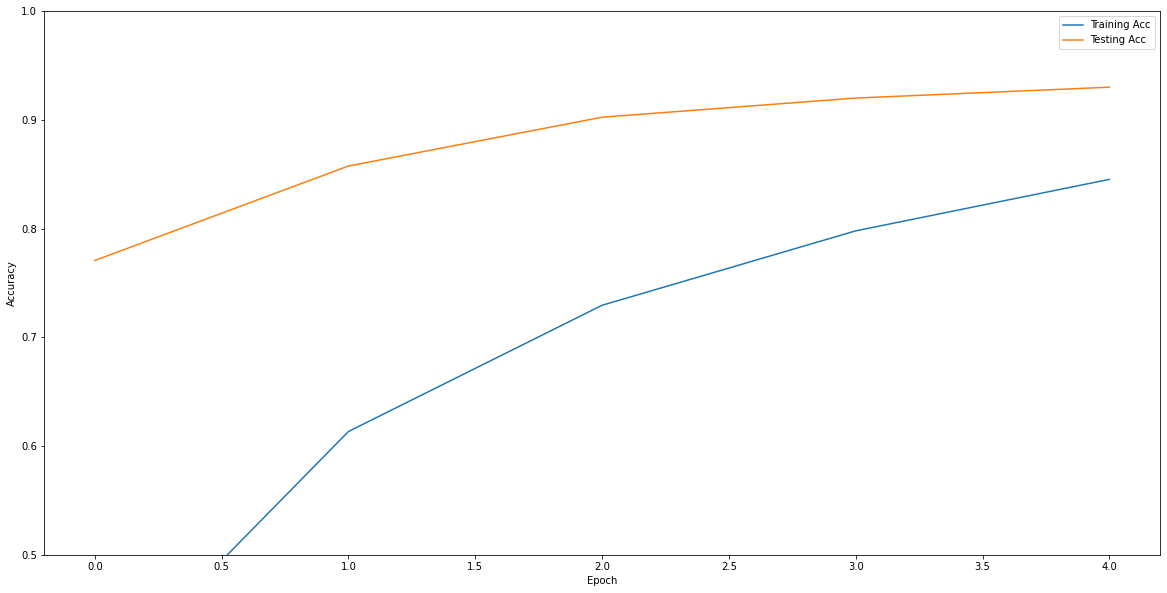

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['acc'], label='Training Acc')
plt.plot(history.history['val_acc'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')

test_loss, test_acc = model.evaluate(X_test, y_test)